** KNN Algorithm **

Tried using the Euclidean distance for the KNN. For N=19 the accuracy seems to be high. 

In [8]:
%matplotlib inline
%run 'TrainingData.ipynb'
%run 'DisplayHelpers.ipynb'

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
import matplotlib.pyplot as plt
import sklearn.metrics.pairwise as smp
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.cross_validation import KFold
from scipy.sparse import lil_matrix

myappdata = TrainingData()

N Fold Precision = 0.559308618436 Recall 0.485795034191
N Fold Precision = 0.563912958955 Recall 0.484514859047
N Fold Precision = 0.565444943772 Recall 0.459894459884
N Fold Precision = 0.553952506622 Recall 0.476676899715
N Fold Precision = 0.559864452654 Recall 0.467460776695
N Fold Precision = 0.587323253925 Recall 0.46385430284
N Fold Precision = 0.575441902318 Recall 0.470887350354
N Fold Precision = 0.575445592626 Recall 0.45582823285
N Fold Precision = 0.565375437919 Recall 0.468587758919
N Fold Precision = 0.58708644815 Recall 0.491515770351
Overall Precision = 0.569315611538 Recall 0.472501544485


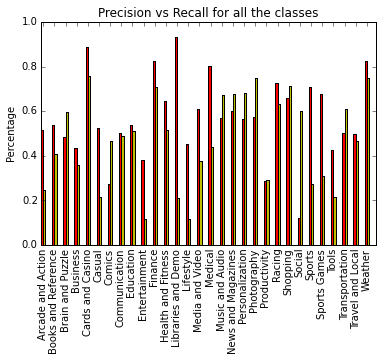

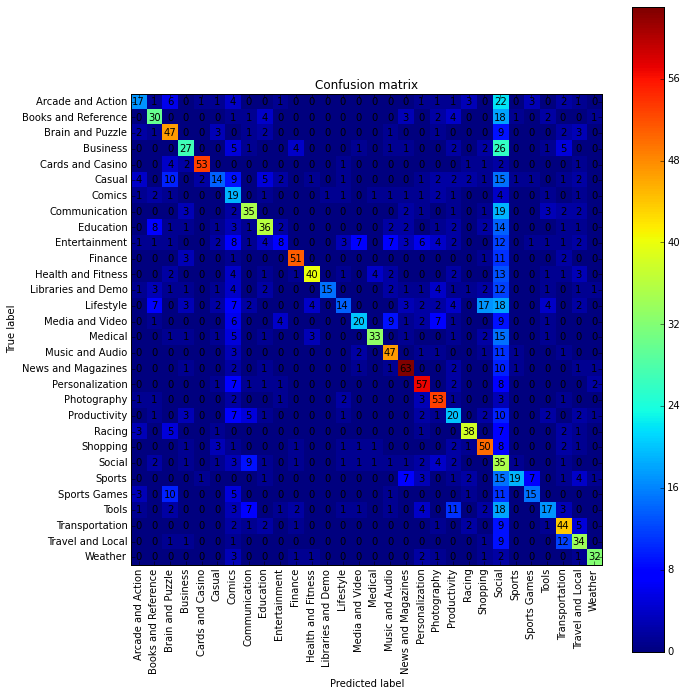

In [9]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

results = []

kf = KFold(n=20104, n_folds=10, random_state=42)
for train_idx, test_idx in kf:
    (train_data, train_labels) = myappdata.get_data_and_labels(train_idx)
    (test_data, test_labels) = myappdata.get_data_and_labels(test_idx)
    test_app_names = myappdata.get_app_names(test_idx)

    clf = KNeighborsClassifier(n_neighbors=17) 
    clf.fit(train_data, train_labels)
    predict_labels_arr = clf.predict(test_data)
    
    (precision, recall, fscore, support) = precision_recall_fscore_support(test_labels, predict_labels_arr)
    
    results.append((precision, recall))
    cm = confusion_matrix(test_labels, predict_labels_arr, myappdata.total_sorted_app_labels)
    
    print("N Fold Precision = {0} Recall {1}".format(sum(precision)/precision.size, sum(recall)/recall.size))

average_precision =  [sum(elem)/len(elem) for elem in zip(*[x[0] for x in results])]
average_recall = [sum(elem)/len(elem) for elem in zip(*[x[1] for x in results])]
print("Overall Precision = {0} Recall {1}".format(sum(average_precision)/len(average_precision), 
                                                  sum(average_recall)/len(average_recall)))
plot_precision_and_recall(average_precision, average_recall, myappdata.total_sorted_app_labels)
plot_confusion_matrix(cm, myappdata.total_sorted_app_labels)


N Fold Precision = 0.563165889535 Recall 0.4029969166
N Fold Precision = 0.539419001741 Recall 0.387686667511
N Fold Precision = 0.587443318246 Recall 0.415987006769
N Fold Precision = 0.561731520886 Recall 0.422833543227
N Fold Precision = 0.555508625318 Recall 0.406239875111
N Fold Precision = 0.556508356005 Recall 0.401335287993
N Fold Precision = 0.567601837493 Recall 0.40793636255
N Fold Precision = 0.560513324385 Recall 0.403326154626
N Fold Precision = 0.565508832733 Recall 0.411635054765
N Fold Precision = 0.577515997679 Recall 0.420400772623
Overall Precision = 0.563491670402 Recall 0.408037764177


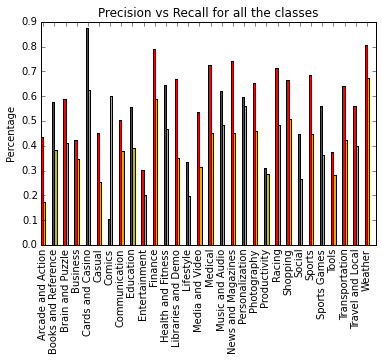

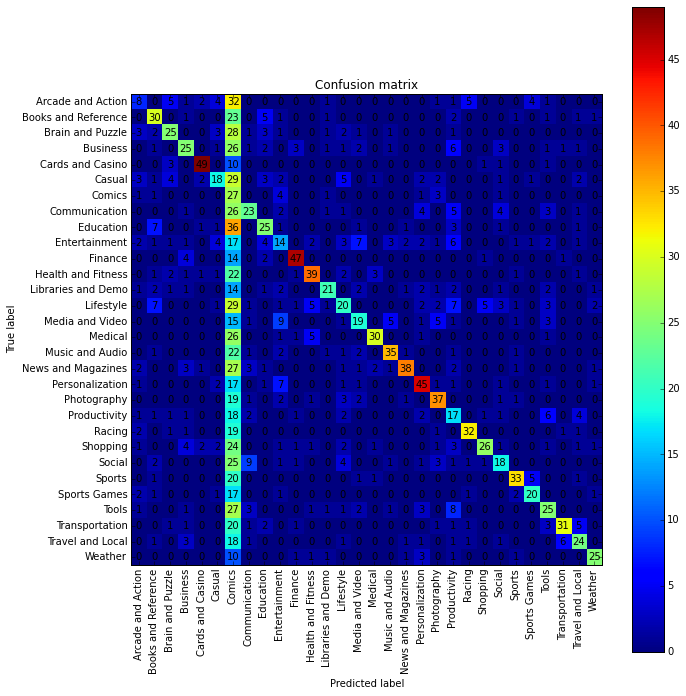

In [10]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

results = []

kf = KFold(n=20104, n_folds=10, random_state=42)
for train_idx, test_idx in kf:
    (train_data, train_labels) = myappdata.get_data_and_labels(train_idx)
    (test_data, test_labels) = myappdata.get_data_and_labels(test_idx)
    test_app_names = myappdata.get_app_names(test_idx)

    clf = KNeighborsClassifier(n_neighbors=1) 
    clf.fit(train_data, train_labels)
    predict_labels_arr = clf.predict(test_data)
    
    (precision, recall, fscore, support) = precision_recall_fscore_support(test_labels, predict_labels_arr)
    
    results.append((precision, recall))
    cm = confusion_matrix(test_labels, predict_labels_arr, myappdata.total_sorted_app_labels)
    
    print("N Fold Precision = {0} Recall {1}".format(sum(precision)/precision.size, sum(recall)/recall.size))

average_precision =  [sum(elem)/len(elem) for elem in zip(*[x[0] for x in results])]
average_recall = [sum(elem)/len(elem) for elem in zip(*[x[1] for x in results])]
print("Overall Precision = {0} Recall {1}".format(sum(average_precision)/len(average_precision), 
                                                  sum(average_recall)/len(average_recall)))
plot_precision_and_recall(average_precision, average_recall, myappdata.total_sorted_app_labels)
plot_confusion_matrix(cm, myappdata.total_sorted_app_labels)


N Fold Precision = 0.571155677842 Recall 0.525910826731
N Fold Precision = 0.563142565244 Recall 0.51417372113
N Fold Precision = 0.572144376059 Recall 0.518788074984
N Fold Precision = 0.570118898139 Recall 0.518203333903
N Fold Precision = 0.564632664411 Recall 0.517448993409
N Fold Precision = 0.580777170903 Recall 0.534198123612
N Fold Precision = 0.588618649537 Recall 0.532487381561
N Fold Precision = 0.585288052137 Recall 0.530702413455
N Fold Precision = 0.563657643763 Recall 0.523609828374
N Fold Precision = 0.572478651765 Recall 0.53126504848
Overall Precision = 0.57320143498 Recall 0.524678774564


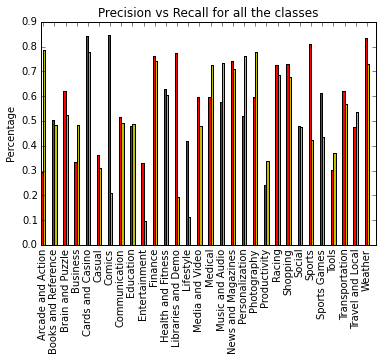

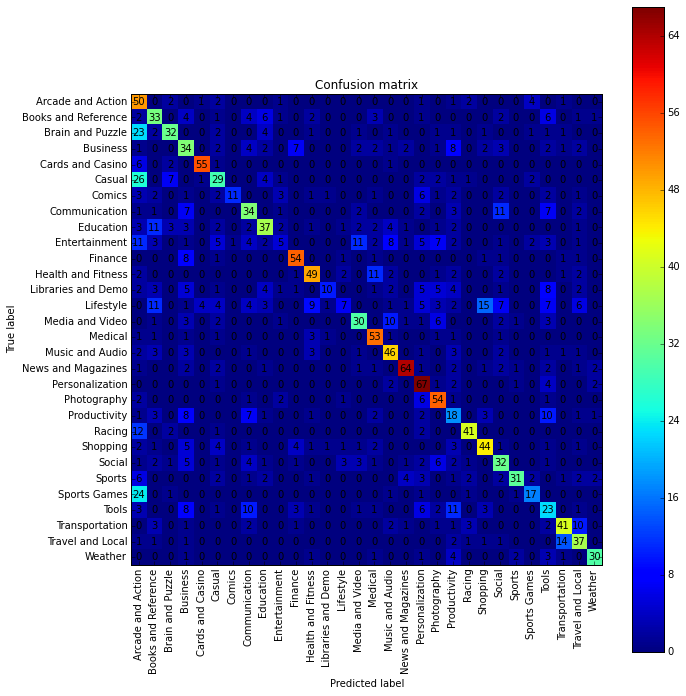

In [14]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.decomposition import TruncatedSVD

results = []

kf = KFold(n=20104, n_folds=10, random_state=42)
for train_idx, test_idx in kf:
    (train_data, train_labels) = myappdata.get_data_and_labels(train_idx)
    (test_data, test_labels) = myappdata.get_data_and_labels(test_idx)
    test_app_names = myappdata.get_app_names(test_idx)
    svd = TruncatedSVD(n_components=200, random_state=42)
    reduced_train_data = svd.fit_transform(train_data)
    clf = KNeighborsClassifier(n_neighbors=100) 
    clf.fit(reduced_train_data, train_labels)
    reduced_test_data = svd.transform(test_data)
    predict_labels_arr = clf.predict(reduced_test_data)
    
    (precision, recall, fscore, support) = precision_recall_fscore_support(test_labels, predict_labels_arr)
    
    results.append((precision, recall))
    cm = confusion_matrix(test_labels, predict_labels_arr, myappdata.total_sorted_app_labels)
    
    print("N Fold Precision = {0} Recall {1}".format(sum(precision)/precision.size, sum(recall)/recall.size))

average_precision =  [sum(elem)/len(elem) for elem in zip(*[x[0] for x in results])]
average_recall = [sum(elem)/len(elem) for elem in zip(*[x[1] for x in results])]
print("Overall Precision = {0} Recall {1}".format(sum(average_precision)/len(average_precision), 
                                                  sum(average_recall)/len(average_recall)))
plot_precision_and_recall(average_precision, average_recall, myappdata.total_sorted_app_labels)
plot_confusion_matrix(cm, myappdata.total_sorted_app_labels)
